In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import gauss
import matplotlib.pyplot as plt

Enter the Order: 4
User 1 code sequence:  [1 0 1 0]
User 2 code sequence:  [1 1 0 0]
BER:  [0.2415  0.12025 0.12375 0.11925 0.12325 0.12525 0.5045 ]


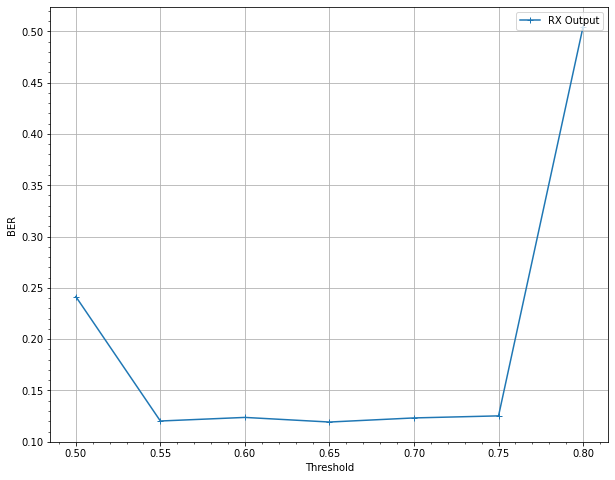

In [2]:
#Generating Sequence
def Hadamard(n):
    H = np.full((n,n), True)


    i1 = 1
    integer = np.log2(n)
    if round(integer)==integer:
        while i1 < n:
            for i2 in range(i1):
                for i3 in range(i1):
                    H[i2+i1][i3]    = H[i2][i3]
                    H[i2][i3+i1]    = H[i2][i3]
                    H[i2+i1][i3+i1] = not H[i2][i3]
            i1 += i1

        # Write the matrix.
        for i in range(n):
            for j in range(n):
                if H[i][j]:
                    H[i][j] = 1
                else:
                    H[i][j] = 0

        H1 = H.astype(int)
        return H1

    else:
        print("Enter n of power 2 please")
        
#Dot Product of Two Rows        
def dot_product(row1, row2):
    #corr = np.zeros(math.factorial(n-1))
    len_row1 = len(row1)
    if len_row1==len(row2):
        product = (np.dot(row1,row2))/len_row1
        return product
    else:
        return none
        





#check_Orthogonality        
def find_minimum(Hada):
    n = Hada.shape[1] #length of the matrix
    corr = 1000 #Creating the storage matrix for dot products
    
    
    corr_index = np.zeros((2),int)
    for i in range(n):
        for j in range(i+1,n):
            product = dot_product(Hada[i],Hada[j])
            if product < corr:
                corr = product
                corr_index[0] = i
                corr_index[1] = j
                
    i = corr_index[0]  
    j = corr_index[1]
    row_i = Hada[i]
    row_j = Hada[j]
    
    return [row_i, row_j]

def cdma_short(data, chips): #Short Code
    ld = len(data)
    lc = len(chips)
    out = np.zeros(ld*lc)
    i = 0
    for d in data:
        for c in chips:
            out[i] = 1-(d+c)%2 #Unipolar Inverting
            i += 1
    return out

data_length = 1000


#---------- Parameter Settings -----------
ovs = 32 #Oversampling Factor
rate = 1e1 #Data Rate in Hz = 100 kHz

n_sigma = [.01,.02,.03,.04,.05,.06]
n_seed = 1


data_shift = [0,0] #Shift of Data Streams (Change Synchronization)


#data = [[1,0,0,1,1,0],[1,0,0,1,1,0]] #Same Data Stream x2
#data_shift = [0,int(ovs/2)] #Data Streams Offset 1/2 Bit Duration

#TX
P_max = 1 #LED Maximum Output Power
TauOn = 2e-6 #Tau for Rising Edge in us
TauOff = 1e-6 #Tau for Falling Edge in us

#RX
P_mindetect = 0.0 #Minimum Power which can be detected
P_maxdetect = 5 #Maximum Power which can be detected (otherwise saturation)



#-----------------------------------------



plt.figure(figsize=(10,8)) #Prepare Plot
seed(n_seed) #Init Random Generator

order = int(input("Enter the Order: "))
l = data_length*order*ovs #Number of Samples
t = np.zeros(l) #Time Vector
n = np.zeros(l) #Noise Vector
dt = 1/(rate*ovs) #Duration of one Sample

def run_led(d, shift=0, label=''):
    P = 0
    tmp_out = np.zeros(l)
    for i in range(len(d)):
        for j in range(ovs):
            if d[i]: #Data = 1
                P += (P_max - P) * (1-np.exp(-dt/TauOn))
            else: #Data = 0
                P *=  np.exp(-dt/TauOff);
            tmp_out[(i*ovs)+j] = P
    #print(tmp_out)
    if shift:
        tmp_out = np.roll(tmp_out, shift)
    #plt.plot(t, tmp_out, marker = '.', linestyle = '-', label = 'LED '+str(label))
    return tmp_out
    

def data_recover(chip_sequences, trans_data, threshold_value):
    
    if len(chip_sequences) == 2:
        stretch_seq0 = np.repeat(chip_sequences[0],ovs)
        stretch_seq1 = np.repeat(chip_sequences[1],ovs)
        loop_length = len(data1)
        stretch_length = len(chip_sequences[0])*ovs

        i = 0
        j = stretch_length
        #threshold_value = .3
        data1_recovered = np.zeros(len(data1))
        data2_recovered = np.zeros(len(data2))
        l = 0

        for k in range(loop_length):
            user1_product = (np.dot(stretch_seq0,trans_data[i:j]))/stretch_length
            user2_product = (np.dot(stretch_seq1,trans_data[i:j]))/stretch_length

            if user1_product < threshold_value:
                data1_recovered[l] = 0
            else:
                data1_recovered[l] = 1

            if user2_product < threshold_value:
                data2_recovered[l] = 0
            else:
                data2_recovered[l] = 1

            l+=1
            i = j
            j+=stretch_length
        return data1_recovered, data2_recovered
    else:
        print("Invalid chip sequences")

Hada = Hadamard(order)
sequences = find_minimum(Hada)
print("User 1 code sequence: ",sequences[0])
print("User 2 code sequence: ",sequences[1])

loop_count = 0
bit_count = 0
TH = [.5,.55,.6,.65,.7,.75,.8]
BER = np.zeros(len(TH))
i_sigma = 0

#for noise in n_sigma:
noise = .0001
for th in TH:
    BER1 = 0
    BER2 = 0
    out = np.zeros(l)
    bit_count = 0
    while BER1+BER2<10 and loop_count <1000:
        for i in range(l):
            n[i] = gauss(0.0, noise) #Generate Noise Samples
            t[i] = dt*i #Set Time Markers for Plotting
    
        data1 = np.random.randint(0,2, data_length)
        data2 = np.random.randint(0,2, data_length)


        cdma_seq1 = cdma_short(data1,sequences[0])
        cdma_seq2 = cdma_short(data2,sequences[1])
        data = [cdma_seq1,cdma_seq2] #Data Streams

        i = 0
        for d in data: #Process Data Stream and Sum-Up of Outputs
            out += run_led(d, data_shift[i], i)
            i += 1

        i = 0
        for o in out: #Clipping at Receiver Side
            if o > P_maxdetect:
                out[i] = P_maxdetect
            elif o < P_mindetect:
                out[i] = 0.0
            i += 1
        #out += n #Add Noise Vector

        data_recovered1,data_recovered2 = data_recover(sequences,out,th)
        #print("Tranmitted data user 1", data1)
        #print("Recovered data user 1", data_recovered1.astype(int))

        bit_count += len(data1) + len(data2)
        loop_count += 1
        BER1 += np.count_nonzero(data_recovered1 != data1)
        BER2 += np.count_nonzero(data_recovered2 != data2)

    BER[i_sigma] = (BER1+BER2)/bit_count
    i_sigma +=1

def show_plot():
    plt.plot(TH, BER, marker = '+', linestyle = '-', label = 'RX Output')
    plt.minorticks_on()
    plt.ylabel('BER')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper right')
    plt.grid(True)
    plt.show()

#print(data_recovered1, data_recovered2)
#print(data1,data2)
print("BER: ", BER)

show_plot()

Enter the Order: 8
User 1 code sequence:  [1 0 1 0 1 0 1 0]
User 2 code sequence:  [1 1 0 0 1 1 0 0]


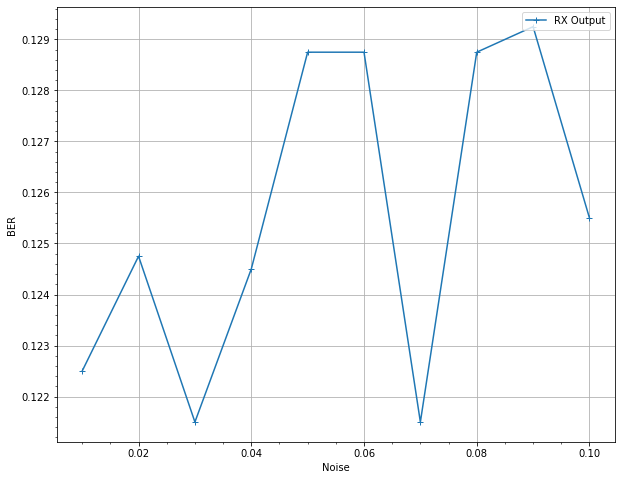

In [6]:
#Generating Sequence
def Hadamard(n):
    H = np.full((n,n), True)


    i1 = 1
    integer = np.log2(n)
    if round(integer)==integer:
        while i1 < n:
            for i2 in range(i1):
                for i3 in range(i1):
                    H[i2+i1][i3]    = H[i2][i3]
                    H[i2][i3+i1]    = H[i2][i3]
                    H[i2+i1][i3+i1] = not H[i2][i3]
            i1 += i1

        # Write the matrix.
        for i in range(n):
            for j in range(n):
                if H[i][j]:
                    H[i][j] = 1
                else:
                    H[i][j] = 0

        H1 = H.astype(int)
        return H1

    else:
        print("Enter n of power 2 please")
        
#Dot Product of Two Rows        
def dot_product(row1, row2):
    #corr = np.zeros(math.factorial(n-1))
    len_row1 = len(row1)
    if len_row1==len(row2):
        product = (np.dot(row1,row2))/len_row1
        return product
    else:
        return none
        





#check_Orthogonality        
def find_minimum(Hada):
    n = Hada.shape[1] #length of the matrix
    corr = 1000 #Creating the storage matrix for dot products
    
    
    corr_index = np.zeros((2),int)
    for i in range(n):
        for j in range(i+1,n):
            product = dot_product(Hada[i],Hada[j])
            if product < corr:
                corr = product
                corr_index[0] = i
                corr_index[1] = j
                
    i = corr_index[0]  
    j = corr_index[1]
    row_i = Hada[i]
    row_j = Hada[j]
    
    return [row_i, row_j]

def cdma_short(data, chips): #Short Code
    ld = len(data)
    lc = len(chips)
    out = np.zeros(ld*lc)
    i = 0
    for d in data:
        for c in chips:
            out[i] = 1-(d+c)%2 #Unipolar Inverting
            i += 1
    return out

data_length = 1000


#---------- Parameter Settings -----------
ovs = 32 #Oversampling Factor
rate = 1e5 #Data Rate in Hz = 100 kHz

n_sigma = [.01,.02,.03,.04,.05,.06,.07,.08,.09,.1]
n_seed = 1


data_shift = [0,0] #Shift of Data Streams (Change Synchronization)


#data = [[1,0,0,1,1,0],[1,0,0,1,1,0]] #Same Data Stream x2
#data_shift = [0,int(ovs/2)] #Data Streams Offset 1/2 Bit Duration

#TX
P_max = 1 #LED Maximum Output Power
TauOn = 2e-6 #Tau for Rising Edge in us
TauOff = 1e-6 #Tau for Falling Edge in us

#RX
P_mindetect = 0.0 #Minimum Power which can be detected
P_maxdetect = 5 #Maximum Power which can be detected (otherwise saturation)



#-----------------------------------------



plt.figure(figsize=(10,8)) #Prepare Plot
seed(n_seed) #Init Random Generator

order = int(input("Enter the Order: "))
l = data_length*order*ovs #Number of Samples
t = np.zeros(l) #Time Vector
n = np.zeros(l) #Noise Vector
dt = 1/(rate*ovs) #Duration of one Sample

def run_led(d, shift=0, label=''):
    P = 0
    tmp_out = np.zeros(l)
    for i in range(len(d)):
        for j in range(ovs):
            if d[i]: #Data = 1
                P += (P_max - P) * (1-np.exp(-dt/TauOn))
            else: #Data = 0
                P *=  np.exp(-dt/TauOff);
            tmp_out[(i*ovs)+j] = P
    #print(tmp_out)
    if shift:
        tmp_out = np.roll(tmp_out, shift)
    #plt.plot(t, tmp_out, marker = '.', linestyle = '-', label = 'LED '+str(label))
    return tmp_out
    

def data_recover(chip_sequences, trans_data):
    
    if len(chip_sequences) == 2:
        stretch_seq0 = np.repeat(chip_sequences[0],ovs)
        stretch_seq1 = np.repeat(chip_sequences[1],ovs)
        loop_length = len(data1)
        stretch_length = len(chip_sequences[0])*ovs

        i = 0
        j = stretch_length
        threshold_value = .6
        data1_recovered = np.zeros(len(data1))
        data2_recovered = np.zeros(len(data2))
        l = 0

        for k in range(loop_length):
            user1_product = (np.dot(stretch_seq0,trans_data[i:j]))/stretch_length
            user2_product = (np.dot(stretch_seq1,trans_data[i:j]))/stretch_length

            if user1_product < threshold_value:
                data1_recovered[l] = 0
            else:
                data1_recovered[l] = 1

            if user2_product < threshold_value:
                data2_recovered[l] = 0
            else:
                data2_recovered[l] = 1

            l+=1
            i = j
            j+=stretch_length
        return data1_recovered, data2_recovered
    else:
        print("Invalid chip sequences")

Hada = Hadamard(order)
sequences = find_minimum(Hada)
print("User 1 code sequence: ",sequences[0])
print("User 2 code sequence: ",sequences[1])

loop_count = 0
bit_count = 0
#TH = .6
BER = np.zeros(len(n_sigma))
i_sigma = 0

for noise in n_sigma:
#noise = .0001
#for th in TH:
    BER1 = 0
    BER2 = 0
    out = np.zeros(l)
    bit_count = 0
    while BER1+BER2<10 and loop_count <1000:
        for i in range(l):
            n[i] = gauss(0.0, noise) #Generate Noise Samples
            t[i] = dt*i #Set Time Markers for Plotting
    
        data1 = np.random.randint(0,2, data_length)
        data2 = np.random.randint(0,2, data_length)


        cdma_seq1 = cdma_short(data1,sequences[0])
        cdma_seq2 = cdma_short(data2,sequences[1])
        data = [cdma_seq1,cdma_seq2] #Data Streams

        i = 0
        for d in data: #Process Data Stream and Sum-Up of Outputs
            out += run_led(d, data_shift[i], i)
            i += 1

        i = 0
        for o in out: #Clipping at Receiver Side
            if o > P_maxdetect:
                out[i] = P_maxdetect
            elif o < P_mindetect:
                out[i] = 0.0
            i += 1
        #out += n #Add Noise Vector

        data_recovered1,data_recovered2 = data_recover(sequences,out)

        bit_count += len(data1) + len(data2)
        loop_count += 1
        BER1 += np.count_nonzero(data_recovered1 != data1)
        BER2 += np.count_nonzero(data_recovered2 != data2)

    BER[i_sigma] = (BER1+BER2)/bit_count
    i_sigma +=1

def show_plot():
    plt.plot(n_sigma, BER, marker = '+', linestyle = '-', label = 'RX Output')
    plt.minorticks_on()
    plt.ylabel('BER')
    plt.xlabel('Noise')
    plt.legend(loc = 'upper right')
    plt.grid(True)
    plt.show()

#print(data_recovered1, data_recovered2)
#print(data1,data2)
#print("BER: ", BER)

show_plot()

Enter the Order: 4
User 1 code sequence:  [1 0 1 0]
User 2 code sequence:  [1 1 0 0]
BER:  [0.124   0.1195  0.13475 0.12575 0.1295  0.4665 ]


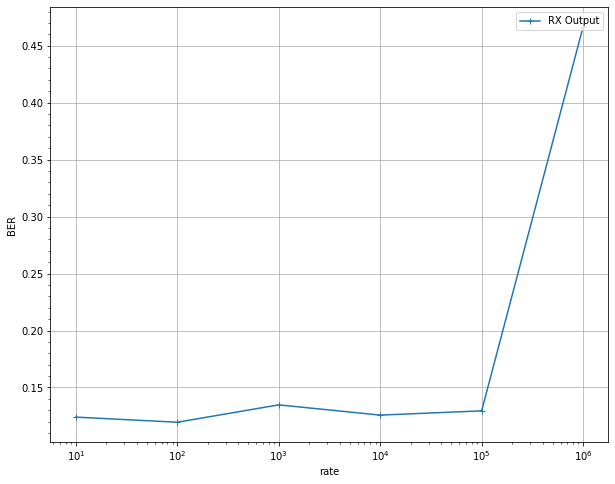

In [4]:
#Generating Sequence
def Hadamard(n):
    H = np.full((n,n), True)


    i1 = 1
    integer = np.log2(n)
    if round(integer)==integer:
        while i1 < n:
            for i2 in range(i1):
                for i3 in range(i1):
                    H[i2+i1][i3]    = H[i2][i3]
                    H[i2][i3+i1]    = H[i2][i3]
                    H[i2+i1][i3+i1] = not H[i2][i3]
            i1 += i1

        # Write the matrix.
        for i in range(n):
            for j in range(n):
                if H[i][j]:
                    H[i][j] = 1
                else:
                    H[i][j] = 0

        H1 = H.astype(int)
        return H1

    else:
        print("Enter n of power 2 please")
        
#Dot Product of Two Rows        
def dot_product(row1, row2):
    #corr = np.zeros(math.factorial(n-1))
    len_row1 = len(row1)
    if len_row1==len(row2):
        product = (np.dot(row1,row2))/len_row1
        return product
    else:
        return none
        





#check_Orthogonality        
def find_minimum(Hada):
    n = Hada.shape[1] #length of the matrix
    corr = 1000 #Creating the storage matrix for dot products
    
    
    corr_index = np.zeros((2),int)
    for i in range(n):
        for j in range(i+1,n):
            product = dot_product(Hada[i],Hada[j])
            if product < corr:
                corr = product
                corr_index[0] = i
                corr_index[1] = j
                
    i = corr_index[0]  
    j = corr_index[1]
    row_i = Hada[i]
    row_j = Hada[j]
    
    return [row_i, row_j]

def cdma_short(data, chips): #Short Code
    ld = len(data)
    lc = len(chips)
    out = np.zeros(ld*lc)
    i = 0
    for d in data:
        for c in chips:
            out[i] = 1-(d+c)%2 #Unipolar Inverting
            i += 1
    return out

data_length = 1000


#---------- Parameter Settings -----------
ovs = 32 #Oversampling Factor
rate = [1e1,1e2,1e3,1e4,1e5,1e6] #Data Rate in Hz = 100 kHz

#n_sigma = [.01,.02,.03,.04,.05,.06]
n_seed = 1


data_shift = [0,0] #Shift of Data Streams (Change Synchronization)


#data = [[1,0,0,1,1,0],[1,0,0,1,1,0]] #Same Data Stream x2
#data_shift = [0,int(ovs/2)] #Data Streams Offset 1/2 Bit Duration

#TX
P_max = 1 #LED Maximum Output Power
TauOn = 2e-6 #Tau for Rising Edge in us
TauOff = 1e-6 #Tau for Falling Edge in us

#RX
P_mindetect = 0.0 #Minimum Power which can be detected
P_maxdetect = 5 #Maximum Power which can be detected (otherwise saturation)



#-----------------------------------------



plt.figure(figsize=(10,8)) #Prepare Plot
seed(n_seed) #Init Random Generator

order = int(input("Enter the Order: "))
l = data_length*order*ovs #Number of Samples
t = np.zeros(l) #Time Vector
n = np.zeros(l) #Noise Vector
#dt = 1/(rate*ovs) #Duration of one Sample

def run_led(d, shift, dt,label=''):
    P = 0
    tmp_out = np.zeros(l)
    for i in range(len(d)):
        for j in range(ovs):
            if d[i]: #Data = 1
                P += (P_max - P) * (1-np.exp(-dt/TauOn))
            else: #Data = 0
                P *=  np.exp(-dt/TauOff);
            tmp_out[(i*ovs)+j] = P
    #print(tmp_out)
    if shift:
        tmp_out = np.roll(tmp_out, shift)
    #plt.plot(t, tmp_out, marker = '.', linestyle = '-', label = 'LED '+str(label))
    return tmp_out
    

def data_recover(chip_sequences, trans_data):
    
    if len(chip_sequences) == 2:
        stretch_seq0 = np.repeat(chip_sequences[0],ovs)
        stretch_seq1 = np.repeat(chip_sequences[1],ovs)
        loop_length = len(data1)
        stretch_length = len(chip_sequences[0])*ovs

        i = 0
        j = stretch_length
        threshold_value = .6
        data1_recovered = np.zeros(len(data1))
        data2_recovered = np.zeros(len(data2))
        l = 0

        for k in range(loop_length):
            user1_product = (np.dot(stretch_seq0,trans_data[i:j]))/stretch_length
            user2_product = (np.dot(stretch_seq1,trans_data[i:j]))/stretch_length

            if user1_product < threshold_value:
                data1_recovered[l] = 0
            else:
                data1_recovered[l] = 1

            if user2_product < threshold_value:
                data2_recovered[l] = 0
            else:
                data2_recovered[l] = 1

            l+=1
            i = j
            j+=stretch_length
        return data1_recovered, data2_recovered
    else:
        print("Invalid chip sequences")

Hada = Hadamard(order)
sequences = find_minimum(Hada)
print("User 1 code sequence: ",sequences[0])
print("User 2 code sequence: ",sequences[1])

loop_count = 0
bit_count = 0
TH = [.5,.55,.6,.65,.7,.75,.8]
BER = np.zeros(len(rate))
i_sigma = 0

#for noise in n_sigma:
noise = .0001
for r in rate:
    dt = 1/(r*ovs) #Duration of one Sample
    BER1 = 0
    BER2 = 0
    out = np.zeros(l)
    bit_count = 0
    while BER1+BER2<10 and loop_count <1000:
        for i in range(l):
            n[i] = gauss(0.0, noise) #Generate Noise Samples
            t[i] = dt*i #Set Time Markers for Plotting
    
        data1 = np.random.randint(0,2, data_length)
        data2 = np.random.randint(0,2, data_length)


        cdma_seq1 = cdma_short(data1,sequences[0])
        cdma_seq2 = cdma_short(data2,sequences[1])
        data = [cdma_seq1,cdma_seq2] #Data Streams

        i = 0
        for d in data: #Process Data Stream and Sum-Up of Outputs
            out += run_led(d, data_shift[i], dt,i)
            i += 1

        i = 0
        for o in out: #Clipping at Receiver Side
            if o > P_maxdetect:
                out[i] = P_maxdetect
            elif o < P_mindetect:
                out[i] = 0.0
            i += 1
        #out += n #Add Noise Vector

        data_recovered1,data_recovered2 = data_recover(sequences,out)
        #print("Tranmitted data user 1", data1)
        #print("Recovered data user 1", data_recovered1.astype(int))

        bit_count += len(data1) + len(data2)
        loop_count += 1
        BER1 += np.count_nonzero(data_recovered1 != data1)
        BER2 += np.count_nonzero(data_recovered2 != data2)

    BER[i_sigma] = (BER1+BER2)/bit_count
    i_sigma +=1

def show_plot():
    plt.xscale('log')
    plt.plot(rate,BER, marker = '+', linestyle = '-', label = 'RX Output')
    plt.minorticks_on()
    plt.ylabel('BER')
    plt.xlabel('rate')
    plt.legend(loc = 'upper right')
    plt.grid(True)
    plt.savefig('BER vs Rate.png')
    plt.show()

#print(data_recovered1, data_recovered2)
#print(data1,data2)
print("BER: ", BER)

show_plot()